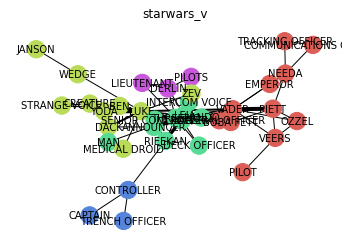

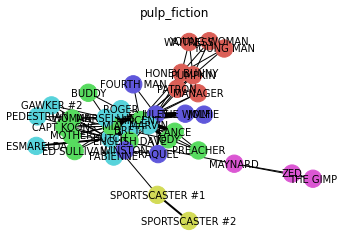

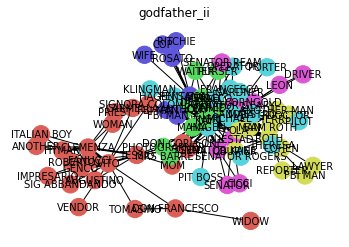

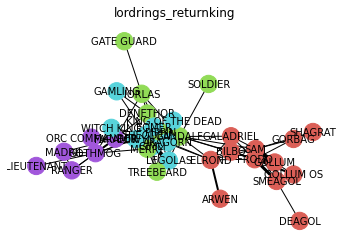

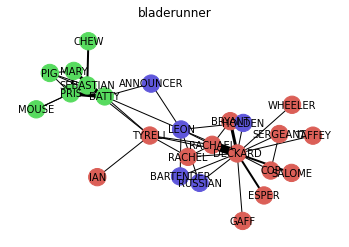

In [22]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import networkx.algorithms.community as nx_comm

"""
partition G and
give a color to each community
"""
def divideG(G):
    communities = nx_comm.louvain_communities(G, weight='value', resolution=1, threshold=1e-07, seed=None)
    palette = sns.color_palette("hls", len(communities))

    for community in communities:
        for node in community:
            index = communities.index(community)
            G.nodes[node]["color"] = palette[index]
    return nx_comm.modularity(G, communities)

"""
draw colored
"""
def drawG(G):
    pos = nx.spring_layout(G, iterations=20, weight="value")

    colors = nx.get_node_attributes(G,'color').values()
    weights = nx.get_edge_attributes(G,'value').values()

    nx.draw(G, pos, width=list(weights), node_color=list(colors), with_labels=True, font_size=10)




pathlist = Path("./movies").rglob('*.gml')
graphs = []
for path in pathlist:
    graphs.append(nx.read_gml(path))
    graphs[-1].graph["title"] = path.stem

df = {
    "title" : [],
    "modularity" : []
}

index = 1
for graph in graphs:
    plt.figure(index)
    plt.title(graph.graph["title"])
    mod = divideG(graph)
    df["modularity"].append(mod)
    df["title"].append(graph.graph["title"])
    drawG(graph)
    index = index + 1




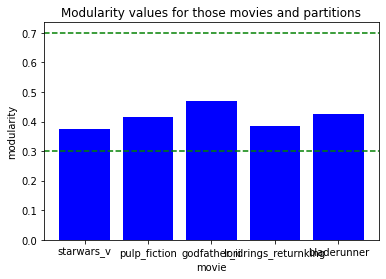

In [21]:
plt.bar(df["title"], df["modularity"], color ='blue')
plt.axhline(y=0.3,linestyle="dashed", color='green')
plt.axhline(y=0.7,linestyle="dashed", color='green')
plt.xlabel("movie")
plt.ylabel("modularity")
plt.title("Modularity values for those movies and partitions")
plt.show()

They all seem to have significant community structure.

In [23]:
graphs = []
for path in ["bladerunner", "starwars_v"]:
    graphs.append(nx.read_gml("./movies/" + path + ".gml"))
    graphs[-1].graph["title"] = path.stem

for G in graphs:
    weights = nx.get_edge_attributes(G,'value').values()
    pos = nx.spring_layout(G, iterations=20, weight="value")

    nx.draw(G, pos, width=list(weights),with_labels=True, font_size=10)

AttributeError: 'str' object has no attribute 'stem'